In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import scipy.stats

In [2]:
# Import Data
data = 'Team_Stats.csv'
teamstats = pd.read_csv(data)
teamstats.head()

Unnamed: 0  Total_Games  Win_Rate  Avg_PtsScored  Avg_PtsAllowed  \
0  Kansas City Chiefs        134.0      0.75          28.44           21.63   
1      Dallas Cowboys        121.0      0.59          26.17           21.66   
2   Green Bay Packers        122.0      0.59          24.10           22.19   
3   Carolina Panthers        116.0      0.36          20.19           24.19   
4    Los Angeles Rams        126.0      0.61          25.33           21.75   

   Avg_Yards  Avg_YardsAllowed  Avg_TurnoverDiff  Avg_PointDiff  Avg_YardDiff  \
0     394.07            352.11             -0.26           6.81         41.96   
1     373.12            336.02             -0.24           4.50         37.09   
2     349.22            337.34             -0.23           1.91         11.88   
3     322.60            336.54              0.33          -4.00        -13.94   
4     362.90            333.90             -0.09           3.58         29.01   

   ...  Away_PtsScored  Home_Yards  Away_Yards  Home_Turnover  Away_Turnover  \
0  ...           29.62      377.76      412.73           1.00           1.32   
1  ...           22.38      396.68      349.93           1.25           1.20   
2  ...           24.11      357.93      346.26           0.89           1.16   
3  ...           19.64      327.25      318.12           1.40           1.53   
4  ...           25.19      364.27      360.75           1.27           1.31   

   Last5_Win_Rate  Last5_Avg_PtsScored  Last5_Avg_PtsAllowed  \
0             1.0                 21.6                  15.0   
1             0.4                 31.8                  18.2   
2             0.8                 31.0                  20.4   
3             0.2                 21.0                   8.6   
4             0.8                 25.8                  22.0   

   Last5_Avg_TurnoverDiff  Last5_Avg_PointDiff  
0                    -0.4                  6.6  
1                    -1.2                 13.6  
2                    -0.8                 10.6  
3                    -1.2                 12.4  
4                     0.4                  3.8  

[5 rows x 21 columns]

In [3]:
# New df without string column to begin investigating relations in the data
# Rename the "Unnamed: 0" column to "Team"
teamstats.rename(columns={'Unnamed: 0': 'Team'}, inplace=True)

# Set the "Team" column as the index of the DataFrame
teamstats.set_index('Team', inplace=True)

# Display the updated DataFrame to confirm
teamstats.head()

Total_Games  Win_Rate  Avg_PtsScored  Avg_PtsAllowed  \
Team                                                                       
Kansas City Chiefs        134.0      0.75          28.44           21.63   
Dallas Cowboys            121.0      0.59          26.17           21.66   
Green Bay Packers         122.0      0.59          24.10           22.19   
Carolina Panthers         116.0      0.36          20.19           24.19   
Los Angeles Rams          126.0      0.61          25.33           21.75   

                    Avg_Yards  Avg_YardsAllowed  Avg_TurnoverDiff  \
Team                                                                
Kansas City Chiefs     394.07            352.11             -0.26   
Dallas Cowboys         373.12            336.02             -0.24   
Green Bay Packers      349.22            337.34             -0.23   
Carolina Panthers      322.60            336.54              0.33   
Los Angeles Rams       362.90            333.90             -0.09   

                    Avg_PointDiff  Avg_YardDiff  Home_PtsScored  \
Team                                                              
Kansas City Chiefs           6.81         41.96           27.07   
Dallas Cowboys               4.50         37.09           30.02   
Green Bay Packers            1.91         11.88           24.56   
Carolina Panthers           -4.00        -13.94           20.75   
Los Angeles Rams             3.58         29.01           25.16   

                    Away_PtsScored  Home_Yards  Away_Yards  Home_Turnover  \
Team                                                                        
Kansas City Chiefs           29.62      377.76      412.73           1.00   
Dallas Cowboys               22.38      396.68      349.93           1.25   
Green Bay Packers            24.11      357.93      346.26           0.89   
Carolina Panthers            19.64      327.25      318.12           1.40   
Los Angeles Rams             25.19      364.27      360.75           1.27   

                    Away_Turnover  Last5_Win_Rate  Last5_Avg_PtsScored  \
Team                                                                     
Kansas City Chiefs           1.32             1.0                 21.6   
Dallas Cowboys               1.20             0.4                 31.8   
Green Bay Packers            1.16             0.8                 31.0   
Carolina Panthers            1.53             0.2                 21.0   
Los Angeles Rams             1.31             0.8                 25.8   

                    Last5_Avg_PtsAllowed  Last5_Avg_TurnoverDiff  \
Team                                                               
Kansas City Chiefs                  15.0                    -0.4   
Dallas Cowboys                      18.2                    -1.2   
Green Bay Packers                   20.4                    -0.8   
Carolina Panthers                    8.6                    -1.2   
Los Angeles Rams                    22.0                     0.4   

                    Last5_Avg_PointDiff  
Team                                     
Kansas City Chiefs                  6.6  
Dallas Cowboys                     13.6  
Green Bay Packers                  10.6  
Carolina Panthers                  12.4  
Los Angeles Rams                    3.8

In [4]:
# Summary statistics
teamstats.describe()

Total_Games   Win_Rate  Avg_PtsScored  Avg_PtsAllowed   Avg_Yards  \
count    32.000000  32.000000      32.000000       32.000000   32.000000   
mean    120.250000   0.495312      22.642812       22.746563  342.536563   
std       4.212118   0.109809       2.540751        1.675051   22.143634   
min     115.000000   0.310000      17.600000       18.800000  293.050000   
25%     117.000000   0.415000      21.052500       21.727500  327.367500   
50%     120.000000   0.490000      22.415000       22.905000  345.250000   
75%     122.000000   0.590000      24.527500       24.212500  356.577500   
max     134.000000   0.750000      28.440000       25.460000  394.070000   

       Avg_YardsAllowed  Avg_TurnoverDiff  Avg_PointDiff  Avg_YardDiff  \
count         32.000000         32.000000      32.000000     32.000000   
mean         343.248438          0.004062      -0.104063     -0.710938   
std           14.812942          0.222636       3.767479     29.769380   
min          315.780000         -0.380000      -6.870000    -55.730000   
25%          334.237500         -0.190000      -3.020000    -22.112500   
50%          344.235000          0.010000      -0.095000     -7.715000   
75%          352.975000          0.135000       3.092500     24.735000   
max          368.530000          0.470000       6.810000     51.150000   

       Home_PtsScored  Away_PtsScored  Home_Yards  Away_Yards  Home_Turnover  \
count       32.000000       32.000000   32.000000   32.000000      32.000000   
mean        23.554063       21.877500  349.762187  338.296250       1.306563   
std          2.731566        2.773228   20.488545   26.395095       0.206454   
min         17.490000       15.320000  310.780000  259.770000       0.890000   
25%         21.227500       19.805000  337.782500  319.887500       1.205000   
50%         23.955000       21.280000  351.670000  341.330000       1.275000   
75%         25.355000       23.742500  364.540000  352.237500       1.420000   
max         30.020000       29.620000  396.680000  412.730000       1.800000   

       Away_Turnover  Last5_Win_Rate  Last5_Avg_PtsScored  \
count      32.000000       32.000000            32.000000   
mean        1.353438        0.487500            27.918750   
std         0.198991        0.237935             3.311314   
min         0.930000        0.000000            21.000000   
25%         1.200000        0.400000            25.800000   
50%         1.315000        0.600000            27.800000   
75%         1.530000        0.600000            30.450000   
max         1.780000        1.000000            33.800000   

       Last5_Avg_PtsAllowed  Last5_Avg_TurnoverDiff  Last5_Avg_PointDiff  
count             32.000000               32.000000            32.000000  
mean              15.993750               -1.025000            11.925000  
std                3.380202                0.690488             4.470044  
min                8.600000               -2.400000             3.800000  
25%               13.750000               -1.300000             8.650000  
50%               15.400000               -0.900000            12.800000  
75%               18.250000               -0.750000            14.600000  
max               23.200000                0.400000            19.200000

In [5]:
# Correlation matrix
corr = teamstats.corr()
corr

Total_Games  Win_Rate  Avg_PtsScored  Avg_PtsAllowed  \
Total_Games                1.000000  0.824886       0.815642       -0.586421   
Win_Rate                   0.824886  1.000000       0.917125       -0.752073   
Avg_PtsScored              0.815642  0.917125       1.000000       -0.579019   
Avg_PtsAllowed            -0.586421 -0.752073      -0.579019        1.000000   
Avg_Yards                  0.754348  0.791801       0.928680       -0.463171   
Avg_YardsAllowed          -0.287449 -0.448528      -0.301165        0.775211   
Avg_TurnoverDiff          -0.523978 -0.758298      -0.694308        0.677418   
Avg_PointDiff              0.810936  0.952921       0.931991       -0.835174   
Avg_YardDiff               0.704139  0.812141       0.840632       -0.730248   
Home_PtsScored             0.616323  0.835732       0.906250       -0.514155   
Away_PtsScored             0.855637  0.835350       0.915457       -0.528081   
Home_Yards                 0.585519  0.705008       0.865753       -0.371319   
Away_Yards                 0.786408  0.767457       0.864779       -0.456465   
Home_Turnover             -0.315029 -0.509851      -0.447610        0.276548   
Away_Turnover             -0.230436 -0.371703      -0.431259        0.304123   
Last5_Win_Rate             0.505335  0.465617       0.415150       -0.291407   
Last5_Avg_PtsScored       -0.328764 -0.217725      -0.187426        0.194382   
Last5_Avg_PtsAllowed       0.280149  0.239958       0.277959       -0.086785   
Last5_Avg_TurnoverDiff     0.237353  0.034142      -0.020332       -0.029083   
Last5_Avg_PointDiff       -0.455387 -0.342740      -0.349031        0.209620   

                        Avg_Yards  Avg_YardsAllowed  Avg_TurnoverDiff  \
Total_Games              0.754348         -0.287449         -0.523978   
Win_Rate                 0.791801         -0.448528         -0.758298   
Avg_PtsScored            0.928680         -0.301165         -0.694308   
Avg_PtsAllowed          -0.463171          0.775211          0.677418   
Avg_Yards                1.000000         -0.268994         -0.500577   
Avg_YardsAllowed        -0.268994          1.000000          0.269761   
Avg_TurnoverDiff        -0.500577          0.269761          1.000000   
Avg_PointDiff            0.832527         -0.547667         -0.769537   
Avg_YardDiff             0.877680         -0.697674         -0.506560   
Home_PtsScored           0.792780         -0.258484         -0.669032   
Away_PtsScored           0.891624         -0.273540         -0.616434   
Home_Yards               0.911197         -0.214378         -0.474586   
Away_Yards               0.941659         -0.258574         -0.489076   
Home_Turnover           -0.309164         -0.050826          0.511091   
Away_Turnover           -0.279626         -0.027521          0.689068   
Last5_Win_Rate           0.290010         -0.143196         -0.354031   
Last5_Avg_PtsScored     -0.202521          0.033415          0.168137   
Last5_Avg_PtsAllowed     0.227374         -0.040491         -0.261011   
Last5_Avg_TurnoverDiff  -0.112000          0.007691         -0.102139   
Last5_Avg_PointDiff     -0.321961          0.055372          0.321926   

                        Avg_PointDiff  Avg_YardDiff  Home_PtsScored  \
Total_Games                  0.810936      0.704139        0.616323   
Win_Rate                     0.952921      0.812141        0.835732   
Avg_PtsScored                0.931991      0.840632        0.906250   
Avg_PtsAllowed              -0.835174     -0.730248       -0.514155   
Avg_Yards                    0.832527      0.877680        0.792780   
Avg_YardsAllowed            -0.547667     -0.697674       -0.258484   
Avg_TurnoverDiff            -0.769537     -0.506560       -0.669032   
Avg_PointDiff                1.000000      0.891765        0.839825   
Avg_YardDiff                 0.891765      1.000000        0.718297   
Home_PtsScored               0.839825      0.718297        1.000000   
Away_PtsScored              

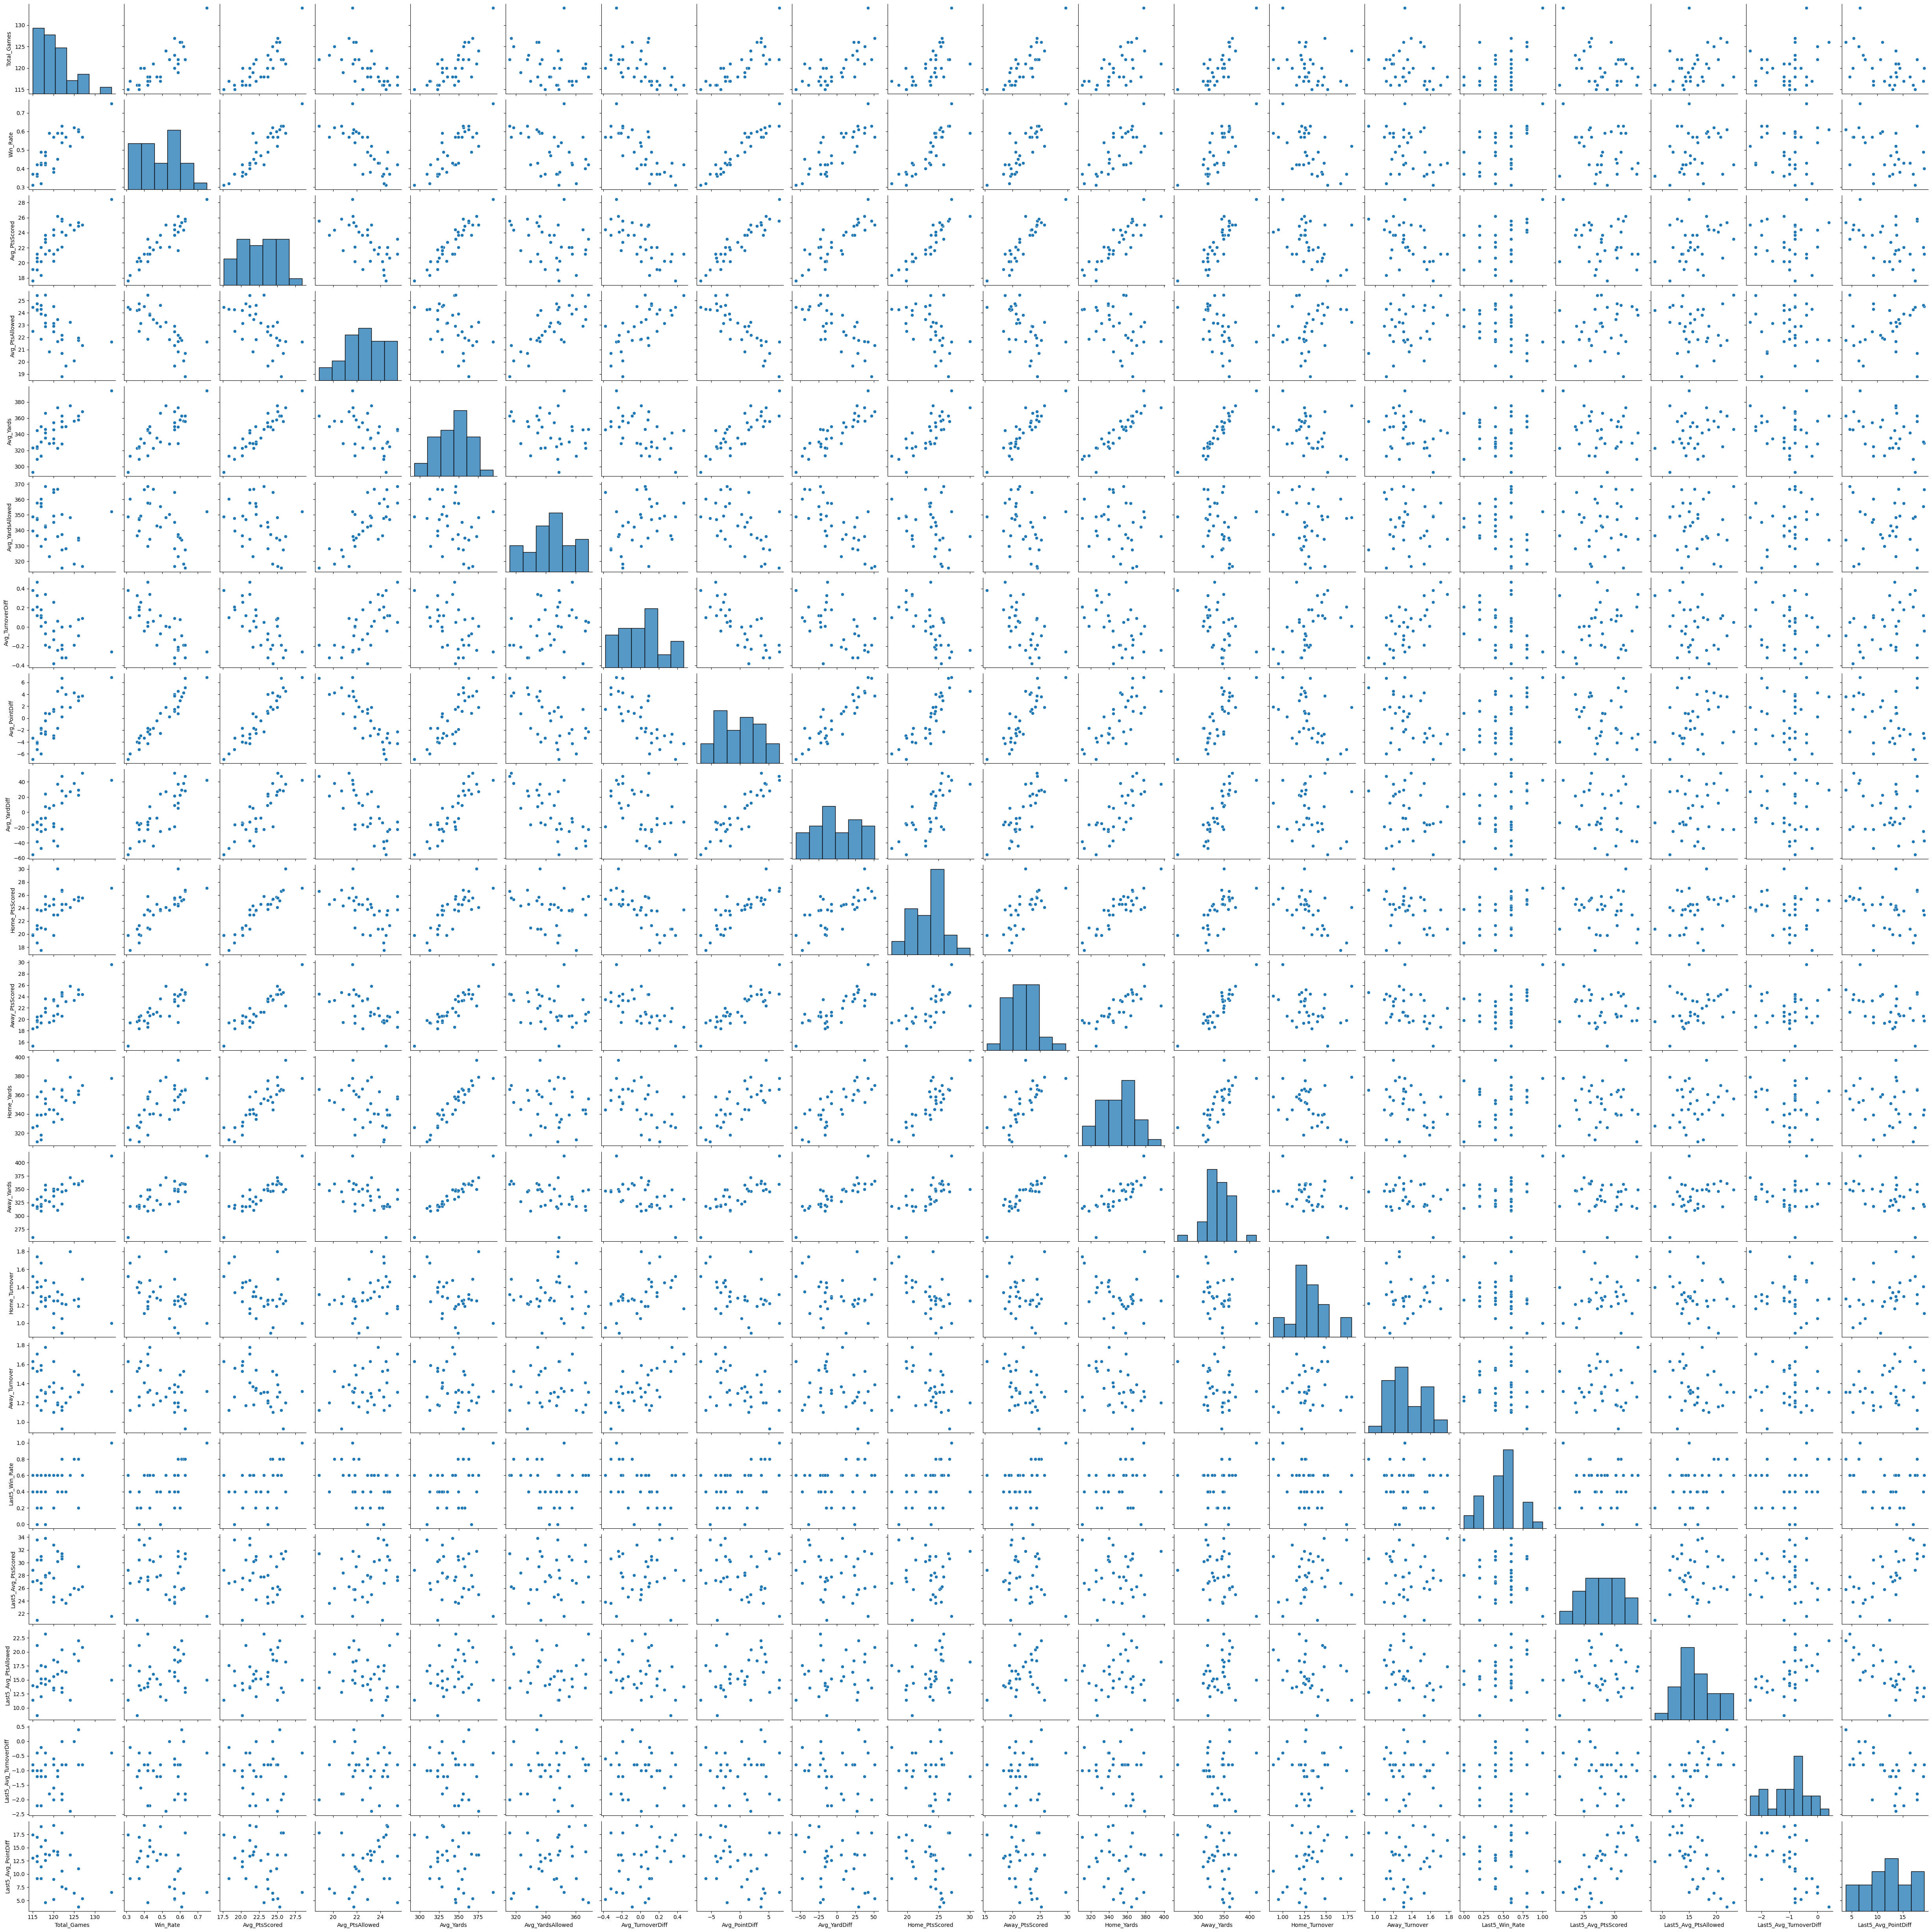

In [6]:
# Pairplot
pairs = sns.pairplot(teamstats)
plt.show()


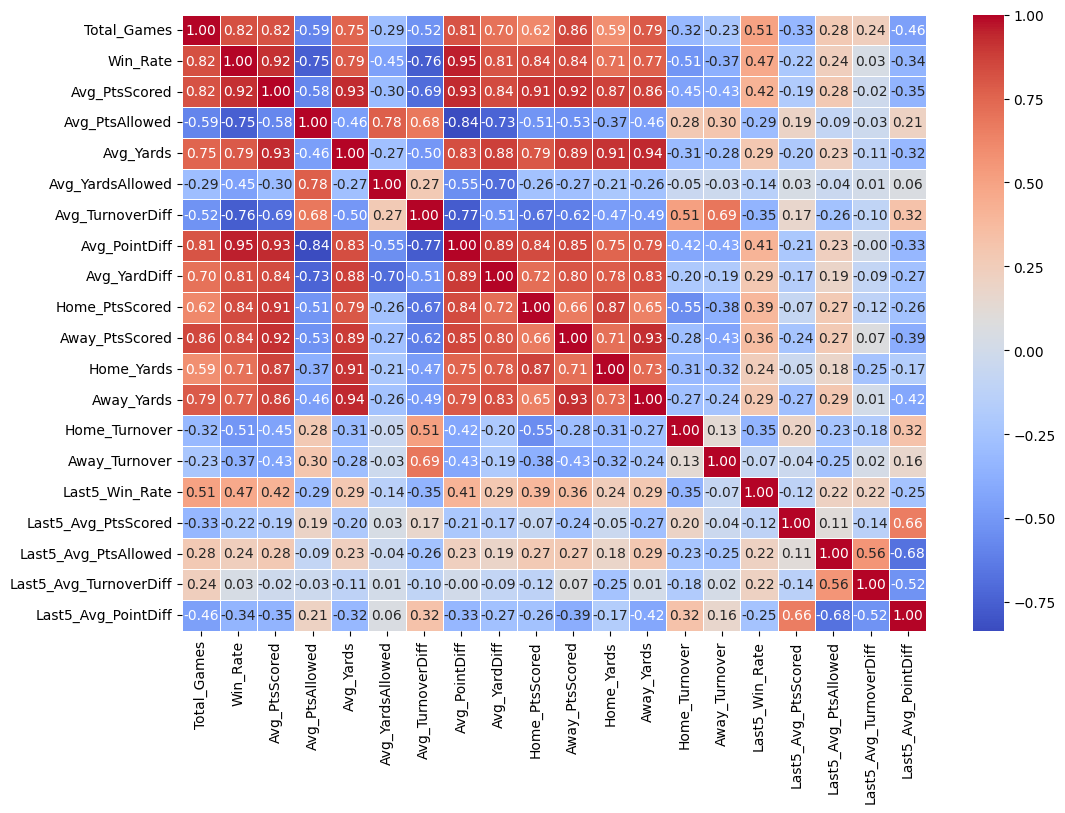

In [7]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Heatmap correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.show()

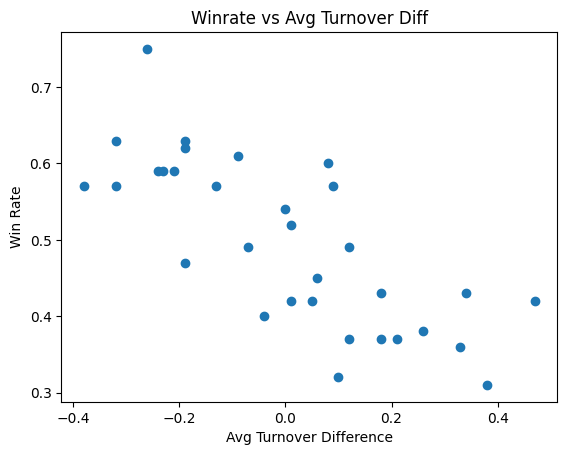

In [8]:
plt.scatter(teamstats.Avg_TurnoverDiff, teamstats.Win_Rate)
plt.xlabel('Avg Turnover Difference')
plt.ylabel('Win Rate')
plt.title('Winrate vs Avg Turnover Diff')
plt.show()

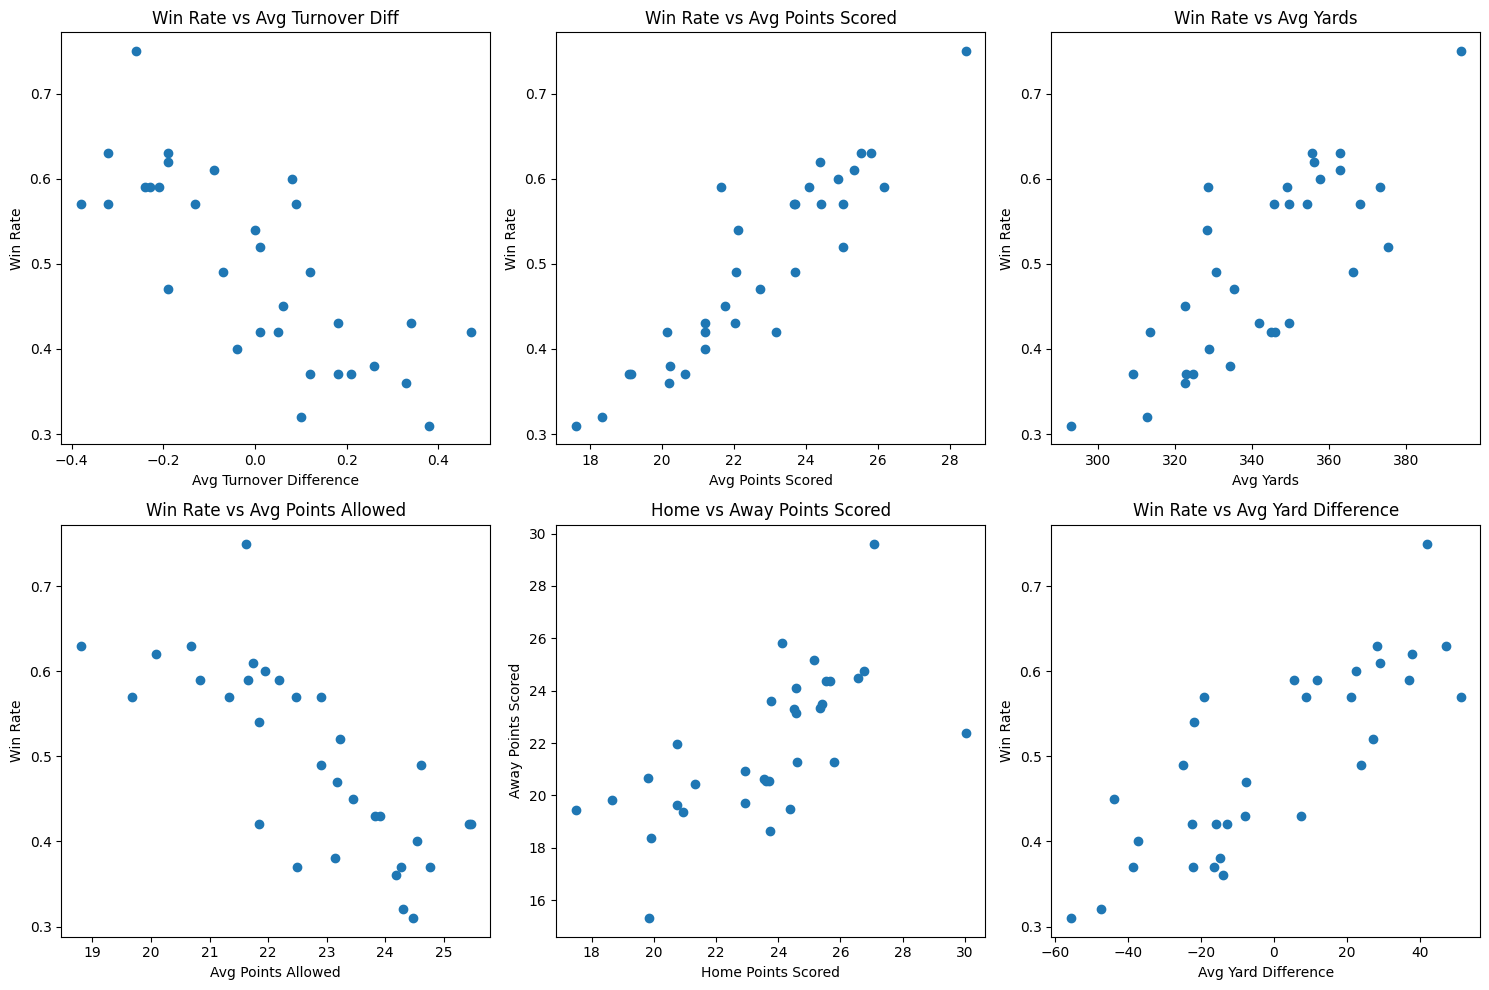

In [9]:
# Create a figure with 6 subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Avg Turnover Diff vs Win Rate
axs[0, 0].scatter(teamstats.Avg_TurnoverDiff, teamstats.Win_Rate)
axs[0, 0].set_xlabel('Avg Turnover Difference')
axs[0, 0].set_ylabel('Win Rate')
axs[0, 0].set_title('Win Rate vs Avg Turnover Diff')

# Plot 2: Avg Points Scored vs Win Rate
axs[0, 1].scatter(teamstats.Avg_PtsScored, teamstats.Win_Rate)
axs[0, 1].set_xlabel('Avg Points Scored')
axs[0, 1].set_ylabel('Win Rate')
axs[0, 1].set_title('Win Rate vs Avg Points Scored')

# Plot 3: Avg Yards vs Win Rate
axs[0, 2].scatter(teamstats.Avg_Yards, teamstats.Win_Rate)
axs[0, 2].set_xlabel('Avg Yards')
axs[0, 2].set_ylabel('Win Rate')
axs[0, 2].set_title('Win Rate vs Avg Yards')

# Plot 4: Avg Points Allowed vs Win Rate
axs[1, 0].scatter(teamstats.Avg_PtsAllowed, teamstats.Win_Rate)
axs[1, 0].set_xlabel('Avg Points Allowed')
axs[1, 0].set_ylabel('Win Rate')
axs[1, 0].set_title('Win Rate vs Avg Points Allowed')

# Plot 5: Home Points Scored vs Away Points Scored
axs[1, 1].scatter(teamstats.Home_PtsScored, teamstats.Away_PtsScored)
axs[1, 1].set_xlabel('Home Points Scored')
axs[1, 1].set_ylabel('Away Points Scored')
axs[1, 1].set_title('Home vs Away Points Scored')

# Plot 6: Avg Yard Difference vs Win Rate
axs[1, 2].scatter(teamstats.Avg_YardDiff, teamstats.Win_Rate)
axs[1, 2].set_xlabel('Avg Yard Difference')
axs[1, 2].set_ylabel('Win Rate')
axs[1, 2].set_title('Win Rate vs Avg Yard Difference')

# Adjust layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plots
plt.show()

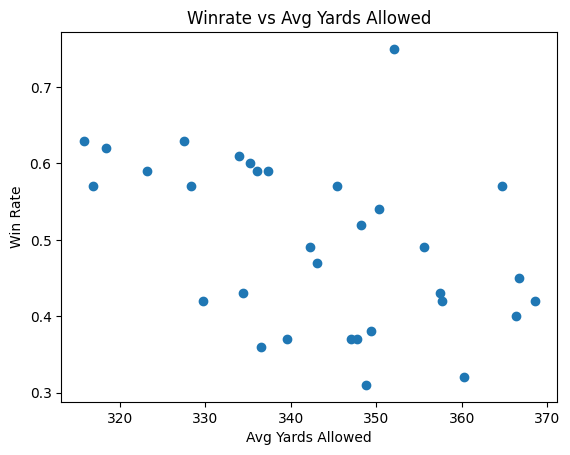

In [10]:
# Scatter plot of average yards allowed vs win rate
plt.scatter(teamstats.Avg_YardsAllowed, teamstats.Win_Rate)
plt.xlabel('Avg Yards Allowed')
plt.ylabel('Win Rate')
plt.title('Winrate vs Avg Yards Allowed')
plt.show()

In [11]:
# Bring in NFL game data from NFL.csv
NFL = pd.read_csv('NFL.csv')
NFL.head()

Date Week  Day    Time              Winner Awaygame  \
0  2017-09-07    1  Thu  8:30PM  Kansas City Chiefs        @   
1  2017-09-10    1  Sun  8:30PM      Dallas Cowboys      NaN   
2  2017-09-10    1  Sun  4:25PM   Green Bay Packers      NaN   
3  2017-09-10    1  Sun  4:25PM   Carolina Panthers        @   
4  2017-09-10    1  Sun  4:05PM    Los Angeles Rams      NaN   

                  Loser  PtsW  PtsL  YdsW  TOW  YdsL  TOL  Tie  PointDiff  \
0  New England Patriots    42    27   537    1   371    0    0         15   
1       New York Giants    19     3   392    0   233    1    0         16   
2      Seattle Seahawks    17     9   370    1   225    1    0          8   
3   San Francisco 49ers    23     3   287    2   217    2    0         20   
4    Indianapolis Colts    46     9   373    1   225    3    0         37   

   YardDiff  TurnoverDiff   Home   Away  
0       166             1  False   True  
1       159            -1   True  False  
2       145             0   True  False  
3        70             0  False   True  
4       148            -2   True  False

In [12]:
# Drop the 'Awaygame' column from the NFL dataframe, rely on home/away columns instead
NFL = NFL.drop(columns=['Awaygame'])


In [13]:
# Drop rows where Tie column is 1
NFL = NFL[NFL['Tie'] == 0]
NFL.head()

Date Week  Day    Time              Winner                 Loser  \
0  2017-09-07    1  Thu  8:30PM  Kansas City Chiefs  New England Patriots   
1  2017-09-10    1  Sun  8:30PM      Dallas Cowboys       New York Giants   
2  2017-09-10    1  Sun  4:25PM   Green Bay Packers      Seattle Seahawks   
3  2017-09-10    1  Sun  4:25PM   Carolina Panthers   San Francisco 49ers   
4  2017-09-10    1  Sun  4:05PM    Los Angeles Rams    Indianapolis Colts   

   PtsW  PtsL  YdsW  TOW  YdsL  TOL  Tie  PointDiff  YardDiff  TurnoverDiff  \
0    42    27   537    1   371    0    0         15       166             1   
1    19     3   392    0   233    1    0         16       159            -1   
2    17     9   370    1   225    1    0          8       145             0   
3    23     3   287    2   217    2    0         20        70             0   
4    46     9   373    1   225    3    0         37       148            -2   

    Home   Away  
0  False   True  
1   True  False  
2   True  False  
3  False   True  
4   True  False

In [14]:
#Drop Tie column now
NFL = NFL.drop(columns=['Tie'])

In [15]:
NFL['Date'] = pd.to_datetime(NFL['Date'])

In [16]:
# Function to assign the season based on the Date
def get_season(date):
    if date.month >= 8:  # From August to December, the game is in the current year season
        return f'{date.year}-{date.year + 1}'
    else:  # From January to March, the game belongs to the previous year's season
        return f'{date.year - 1}-{date.year}'

# Apply the function to create the 'Season' column
NFL['Season'] = NFL['Date'].apply(get_season)


In [17]:
# Split the data by season
season_data = {season: NFL[NFL['Season'] == season] for season in NFL['Season'].unique()}

In [18]:
# Initialize a dictionary to store results by team and season
team_results = {}

# Iterate through each season and get results for each team
for season, data in season_data.items():
    # Initialize dictionary for this season
    season_team_results = {}
    
    # Get unique teams
    teams = set(data['Winner']).union(set(data['Loser']))  # All unique teams in the season
    
    for team in teams:
        # Get games where the team won
        won_games = data[data['Winner'] == team]
        
        # Get games where the team lost
        lost_games = data[data['Loser'] == team]
        
        # Store the results for this team in the season
        season_team_results[team] = {
            'won': won_games,
            'lost': lost_games
        }
    
    # Store the results for the season
    team_results[season] = season_team_results

In [19]:
# Access results for Dallas Cowboys in the 2017-2018 season
dallas_cowboys_2017_2018 = team_results['2017-2018']['Dallas Cowboys']

# Display won games
print(dallas_cowboys_2017_2018['won'])

# Display lost games
print(dallas_cowboys_2017_2018['lost'])


          Date Week  Day    Time          Winner                  Loser  PtsW  \
1   2017-09-10    1  Sun  8:30PM  Dallas Cowboys        New York Giants    19   
46  2017-09-25    3  Mon  8:30PM  Dallas Cowboys      Arizona Cardinals    28   
99  2017-10-22    7  Sun  4:05PM  Dallas Cowboys    San Francisco 49ers    40   
115 2017-10-29    8  Sun  4:25PM  Dallas Cowboys  Washington Commanders    33   
128 2017-11-05    9  Sun  4:25PM  Dallas Cowboys     Kansas City Chiefs    28   
176 2017-11-30   13  Thu  8:25PM  Dallas Cowboys  Washington Commanders    38   
202 2017-12-10   14  Sun  1:00PM  Dallas Cowboys        New York Giants    30   
211 2017-12-17   15  Sun  8:30PM  Dallas Cowboys      Las Vegas Raiders    20   
253 2017-12-31   17  Sun  1:00PM  Dallas Cowboys    Philadelphia Eagles     6   

     PtsL  YdsW  TOW  YdsL  TOL  PointDiff  YardDiff  TurnoverDiff   Home  \
1       3   392    0   233    1         16       159            -1   True   
46     17   273    0   332    0    

In [20]:
# Additional features
# Total Points
NFL['TotalPoints'] = NFL['PtsW'] + NFL['PtsL']

# Total yards
NFL['TotalYards'] = NFL['YdsW'] + NFL['YdsL']

# Total Turnovers
NFL['TotalTurnovers'] = NFL['TOW'] + NFL['TOL']

# Turnover Ratio
NFL['TurnoverRatio'] = NFL['TOW'] / NFL['TOL'].replace(0, 1)  # Avoid division by zero

# Yard Efficiency
NFL['YardEfficiencyW'] = NFL['YdsW'] / NFL['PtsW']
NFL['YardEfficiencyL'] = NFL['YdsL'] / NFL['PtsL']

# Scoring Efficieny
NFL['ScoringEfficiencyW'] = NFL['PtsW'] / NFL['YdsW']
NFL['ScoringEfficiencyL'] = NFL['PtsL'] / NFL['YdsL']

# Round to 2 decimals
NFL[['TotalYards', 'TotalTurnovers', 'TurnoverRatio', 'YardEfficiencyW', 'YardEfficiencyL', 'ScoringEfficiencyW', 'ScoringEfficiencyL']] = NFL[['TotalYards', 'TotalTurnovers', 'TurnoverRatio', 'YardEfficiencyW', 'YardEfficiencyL', 'ScoringEfficiencyW', 'ScoringEfficiencyL']].round(2)


In [21]:
NFL.head(3)

Date Week  Day    Time              Winner                 Loser  \
0 2017-09-07    1  Thu  8:30PM  Kansas City Chiefs  New England Patriots   
1 2017-09-10    1  Sun  8:30PM      Dallas Cowboys       New York Giants   
2 2017-09-10    1  Sun  4:25PM   Green Bay Packers      Seattle Seahawks   

   PtsW  PtsL  YdsW  TOW  ...   Away     Season  TotalPoints  TotalYards  \
0    42    27   537    1  ...   True  2017-2018           69         908   
1    19     3   392    0  ...  False  2017-2018           22         625   
2    17     9   370    1  ...  False  2017-2018           26         595   

   TotalTurnovers  TurnoverRatio  YardEfficiencyW YardEfficiencyL  \
0               1            1.0            12.79           13.74   
1               1            0.0            20.63           77.67   
2               2            1.0            21.76           25.00   

   ScoringEfficiencyW  ScoringEfficiencyL  
0                0.08                0.07  
1                0.05                0.01  
2                0.05                0.04  

[3 rows x 26 columns]

In [22]:
NFL = NFL[['Date', 'Week', 'Day', 'Time', 'Winner', 'Loser', 'PtsW', 'PtsL', 'TotalPoints', 'PointDiff',
        'YdsW', 'YdsL', 'YardDiff', 'TOW', 'TOL', 'TotalTurnovers', 'TurnoverDiff', 'TotalYards', 'TurnoverRatio',
        'YardEfficiencyW', 'YardEfficiencyL', 'ScoringEfficiencyW', 'ScoringEfficiencyL', 'Home', 'Away',]]


In [33]:
# Describe data in NFL
NFL.drop(columns=['Date']).describe()

/Users/jonathan/Library/Python/3.9/lib/python/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


PtsW         PtsL  TotalPoints    PointDiff         YdsW  \
count  1917.000000  1917.000000  1917.000000  1917.000000  1917.000000   
mean     28.418362    17.173187    45.591549    11.245175   371.888367   
std       8.492428     8.271505    14.141973     9.004602    77.829219   
min       3.000000     0.000000     3.000000     1.000000   136.000000   
25%      23.000000    10.000000    36.000000     4.000000   320.000000   
50%      27.000000    17.000000    44.000000     8.000000   372.000000   
75%      34.000000    23.000000    55.000000    16.000000   421.000000   
max      70.000000    51.000000   105.000000    50.000000   726.000000   

              YdsL     YardDiff          TOW          TOL  TotalTurnovers  \
count  1917.000000  1917.000000  1917.000000  1917.000000     1917.000000   
mean    316.825769    55.062598     0.867501     1.786124        2.653625   
std      82.799711   106.671815     0.909916     1.258854        1.569544   
min      47.000000  -326.000000     0.000000     0.000000        0.000000   
25%     260.000000   -16.000000     0.000000     1.000000        2.000000   
50%     314.000000    54.000000     1.000000     2.000000        3.000000   
75%     373.000000   126.000000     1.000000     3.000000        4.000000   
max     613.000000   468.000000     5.000000     7.000000        9.000000   

       TurnoverDiff   TotalYards  TurnoverRatio  YardEfficiencyW  \
count   1917.000000  1917.000000    1917.000000      1917.000000   
mean      -0.918623   688.714137       0.582415        13.936109   
std        1.536831   120.197683       0.721951         4.239862   
min       -6.000000   324.000000       0.000000         4.630000   
25%       -2.000000   605.000000       0.000000        11.220000   
50%       -1.000000   682.000000       0.330000        13.290000   
75%        0.000000   768.000000       1.000000        15.890000   
max        5.000000  1151.000000       5.000000        77.000000   

       YardEfficiencyL  ScoringEfficiencyW  ScoringEfficiencyL  
count          1917.00         1917.000000         1917.000000  
mean               inf            0.077334            0.053276  
std                NaN            0.020912            0.021994  
min               5.30            0.010000            0.000000  
25%              14.92            0.060000            0.040000  
50%              18.54            0.080000            0.050000  
75%              25.12            0.090000            0.070000  
max                inf            0.220000            0.190000

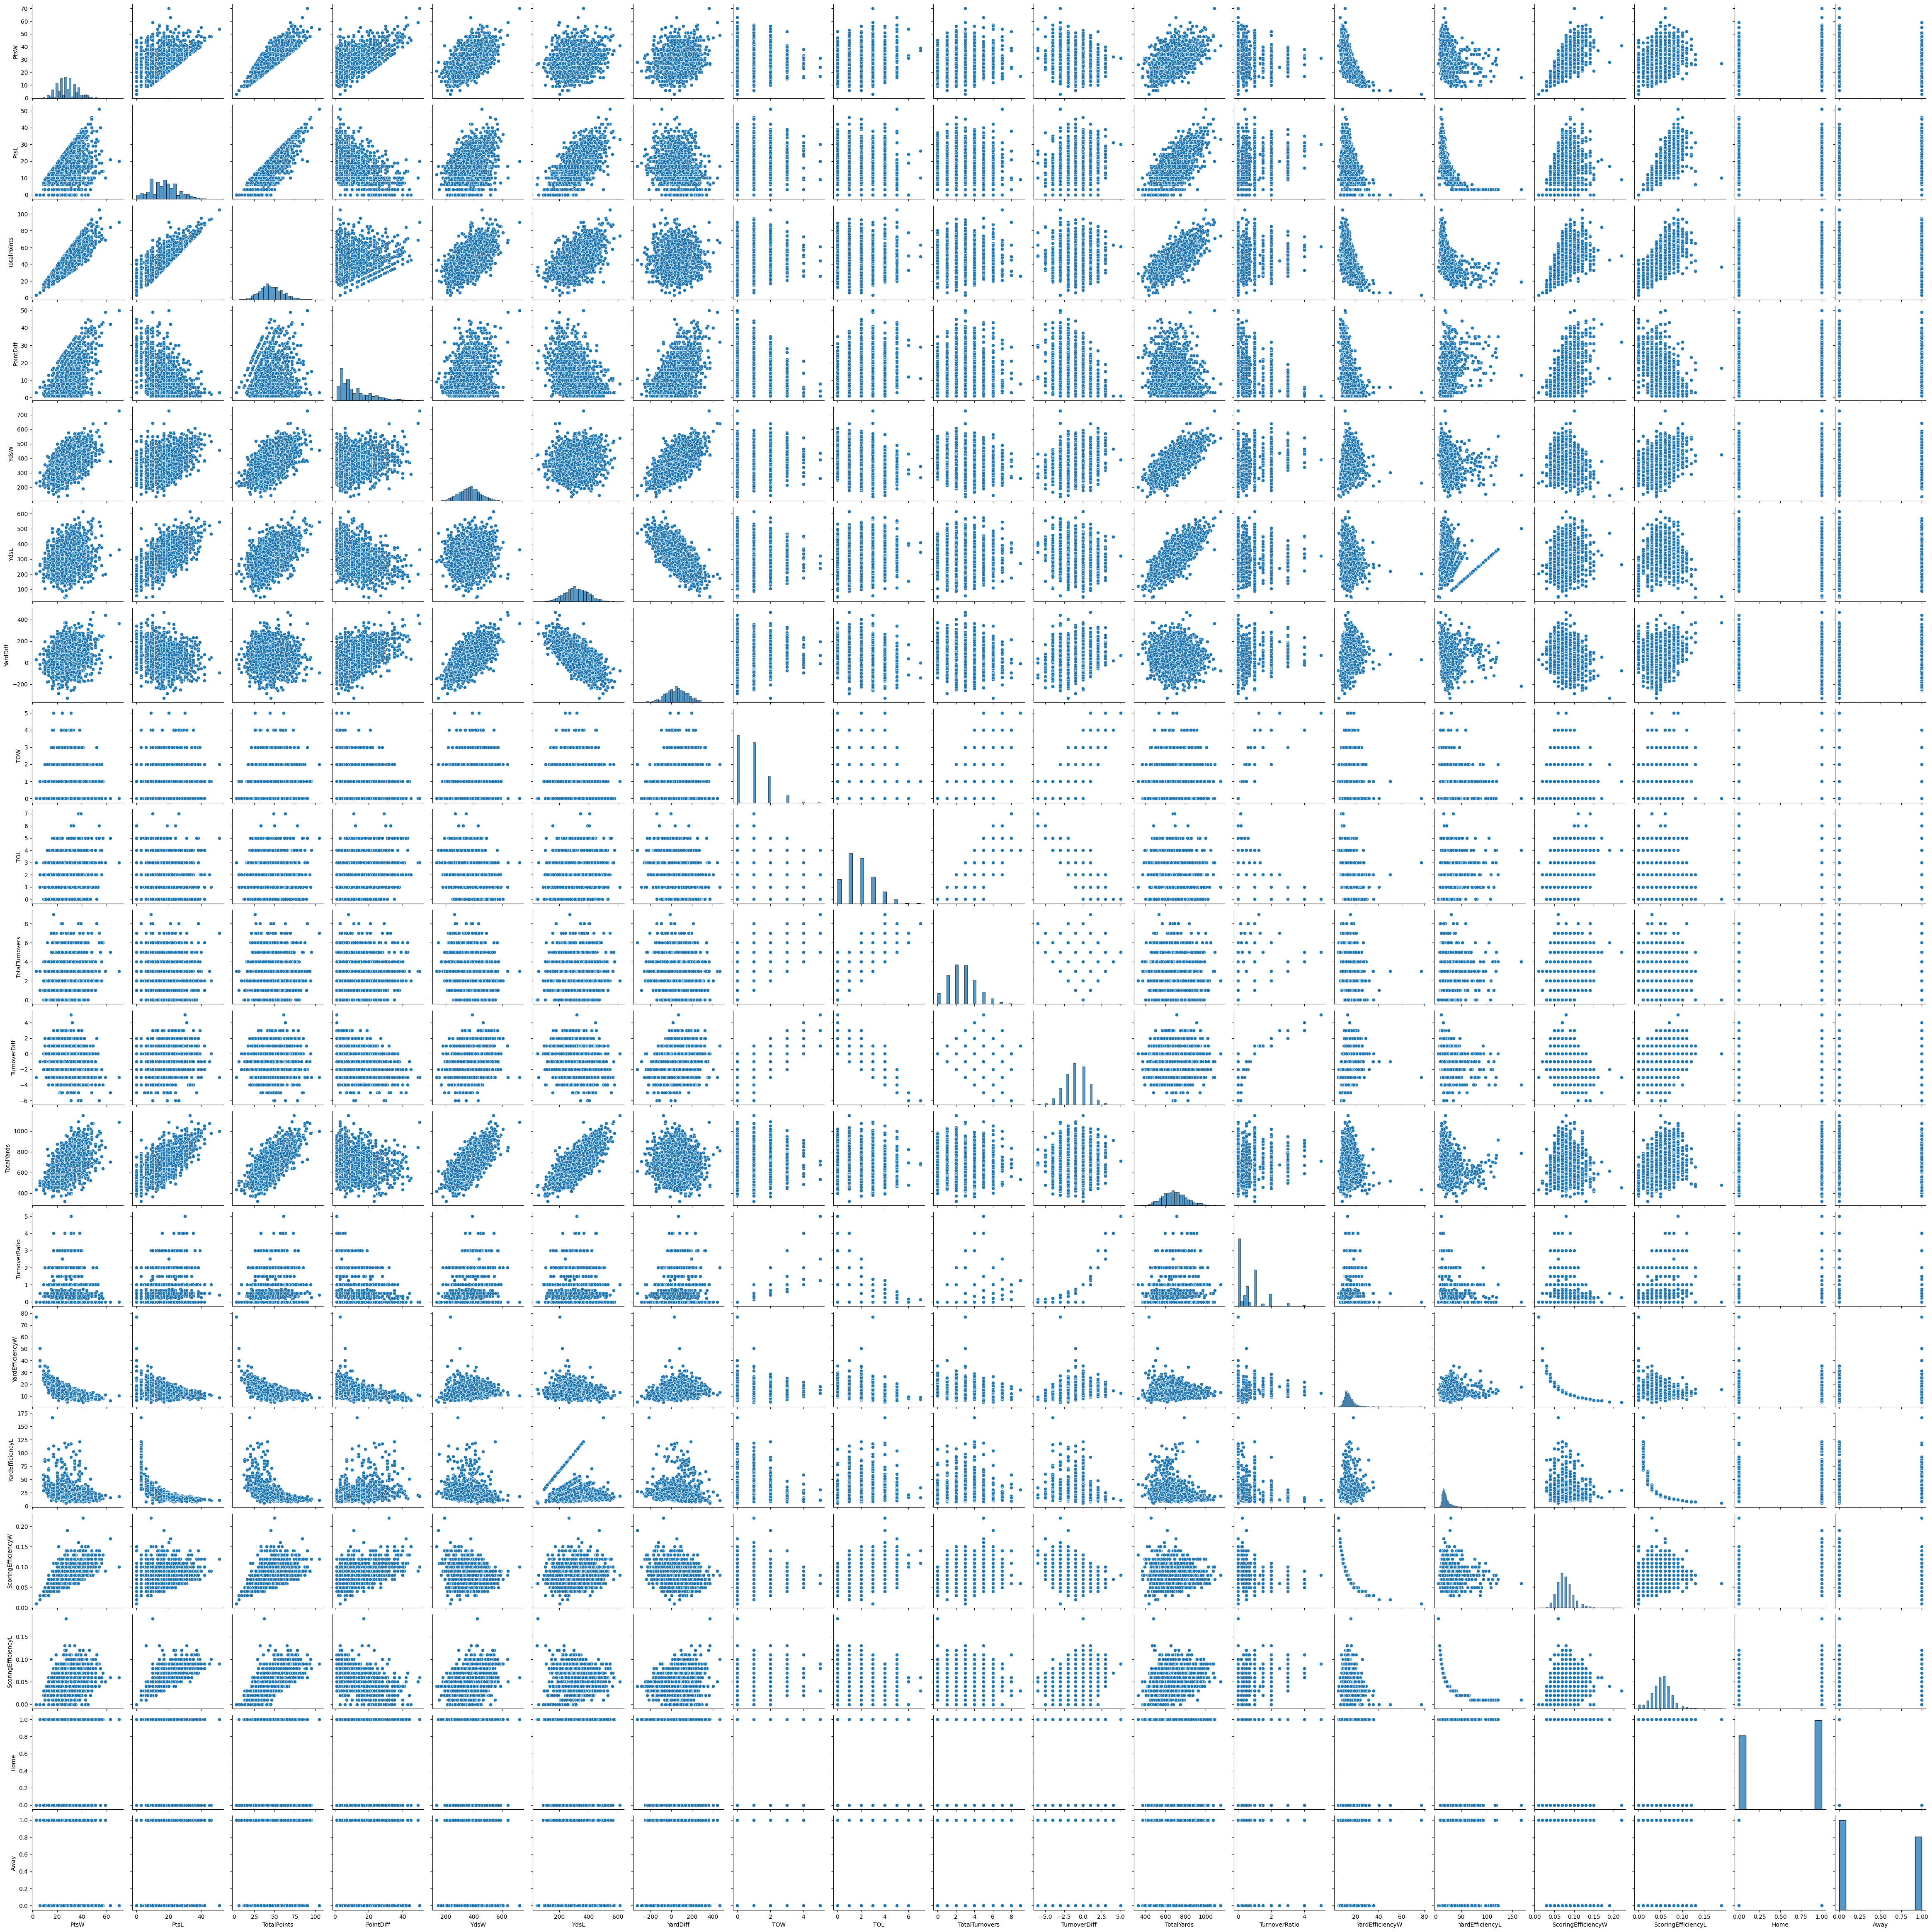

In [23]:
# Pairplot
pairs = sns.pairplot(NFL)
plt.show()


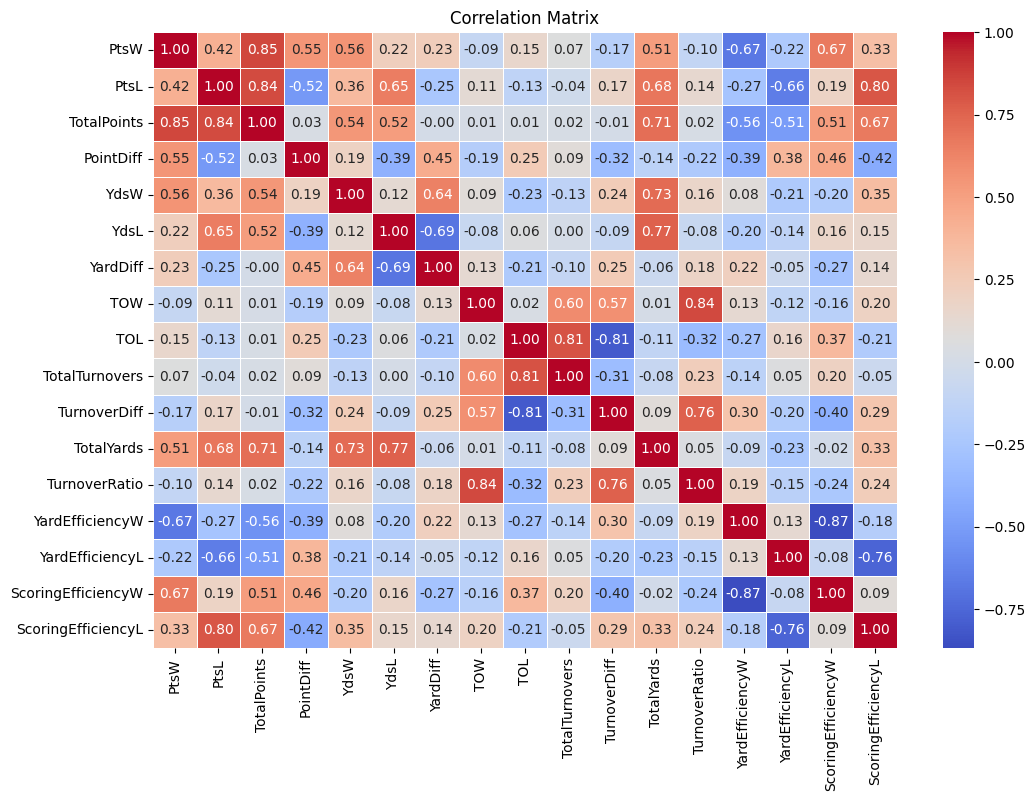

In [24]:
# Select only numeric columns
numeric_cols = NFL.select_dtypes(include=['number']).columns

# Compute the correlation matrix on just the numeric columns
correlation_matrix = NFL[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [25]:
# View matrix
correlation_matrix

PtsW      PtsL  TotalPoints  PointDiff      YdsW  \
PtsW                1.000000  0.423205     0.848041   0.554370  0.556131   
PtsL                0.423205  1.000000     0.839031  -0.519453  0.360199   
TotalPoints         0.848041  0.839031     1.000000   0.029083  0.544640   
PointDiff           0.554370 -0.519453     0.029083   1.000000  0.193625   
YdsW                0.556131  0.360199     0.544640   0.193625  1.000000   
YdsL                0.222654  0.654627     0.516591  -0.391342  0.119045   
YardDiff            0.232935 -0.245322    -0.003606   0.445035  0.637210   
TOW                -0.090488  0.112270     0.011326  -0.188471  0.091502   
TOL                 0.146925 -0.125460     0.014850   0.253814 -0.231741   
TotalTurnovers      0.065382 -0.035539     0.018477   0.094309 -0.132822   
TurnoverDiff       -0.173925  0.169239    -0.005458  -0.319493  0.244000   
TotalYards          0.513478  0.684180     0.708520  -0.144207  0.729516   
TurnoverRatio      -0.103531  0.138227     0.018676  -0.224616  0.160806   
YardEfficiencyW    -0.671124 -0.267411    -0.559425  -0.387311  0.082195   
YardEfficiencyL    -0.219012 -0.655453    -0.509784   0.382199 -0.213171   
ScoringEfficiencyW  0.671525  0.188087     0.513269   0.460555 -0.198541   
ScoringEfficiencyL  0.329147  0.799058     0.665018  -0.423579  0.346909   

                        YdsL  YardDiff       TOW       TOL  TotalTurnovers  \
PtsW                0.222654  0.232935 -0.090488  0.146925        0.065382   
PtsL                0.654627 -0.245322  0.112270 -0.125460       -0.035539   
TotalPoints         0.516591 -0.003606  0.011326  0.014850        0.018477   
PointDiff          -0.391342  0.445035 -0.188471  0.253814        0.094309   
YdsW                0.119045  0.637210  0.091502 -0.231741       -0.132822   
YdsL                1.000000 -0.689353 -0.075525  0.058072        0.002792   
YardDiff           -0.689353  1.000000  0.125384 -0.214158       -0.099076   
TOW                -0.075525  0.125384  1.000000  0.022179        0.597521   
TOL                 0.058072 -0.214158  0.022179  1.000000        0.814908   
TotalTurnovers      0.002792 -0.099076  0.597521  0.814908        1.000000   
TurnoverDiff       -0.092284  0.249658  0.573905 -0.805992       -0.313735   
TotalYards          0.765945 -0.062270  0.007222 -0.110051       -0.084080   
TurnoverRatio      -0.078708  0.178421  0.842780 -0.320986        0.231139   
YardEfficiencyW    -0.201496  0.216374  0.131499 -0.272230       -0.142108   
YardEfficiencyL    -0.136457 -0.051728 -0.122960  0.157803        0.054410   
ScoringEfficiencyW  0.163226 -0.271556 -0.160928  0.369302        0.202904   
ScoringEfficiencyL  0.148697  0.137689  0.195391 -0.207487       -0.053141   

                    TurnoverDiff  TotalYards  TurnoverRatio  YardEfficiencyW  \
PtsW                   -0.173925    0.513478      -0.103531        -0.671124   
PtsL                    0.169239    0.684180       0.138227        -0.267411   
TotalPoints            -0.005458    0.708520       0.018676        -0.559425   
PointDiff              -0.319493   -0.144207      -0.224616        -0.387311   
YdsW                    0.244000    0.729516       0.160806         0.082195   
YdsL                   -0.092284    0.765945      -0.078708        -0.201496   
YardDiff                0.249658   -0.062270       0.178421         0.216374   
TOW                     0.573905    0.007222       0.842780         0.131499   
TOL                    -0.805992   -0.110051      -0.320986        -0.272230   
TotalTurnovers         -0.313735   -0.084080       0.231139        -0.142108   
TurnoverDiff            1.000000    0.094421       0.761914         0.300847   
TotalYards              0.094421    1.000000       0.049904        -0.085582   
TurnoverRatio           0.761914    0.049904       1.000000         0.188285   
YardEfficiencyW         0.300847   -0.085582       0.188285         1.000000   
YardEfficiencyL        -0.202420   -0.234015      

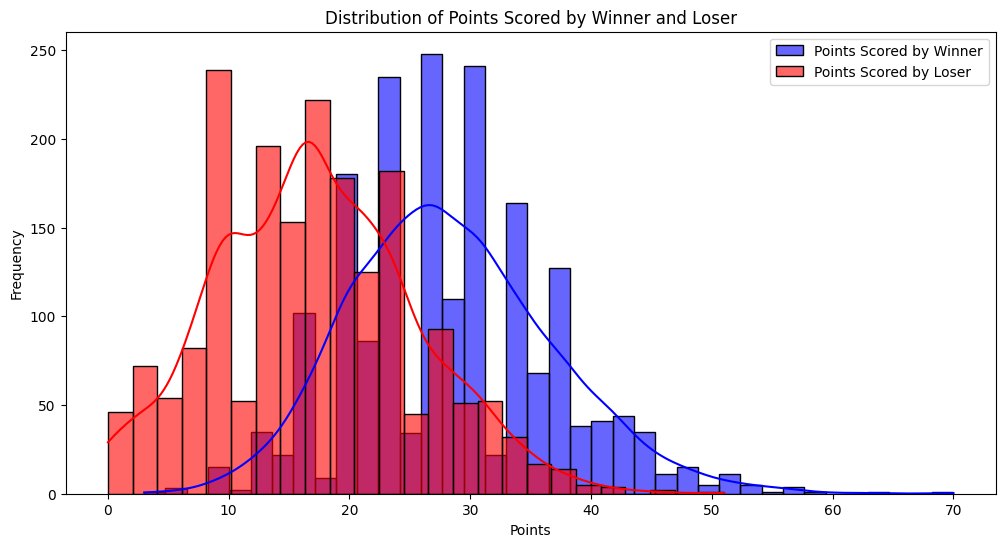

In [26]:
# Plotting the distribution of points scored by the winner and loser
plt.figure(figsize=(12, 6))

# Plot the points scored by the winner (PtsW)
sns.histplot(NFL['PtsW'], kde=True, color='blue', label='Points Scored by Winner', alpha=0.6)

# Plot the points scored by the loser (PtsL)
sns.histplot(NFL['PtsL'], kde=True, color='red', label='Points Scored by Loser', alpha=0.6)

# Adding the title and labels
plt.title("Distribution of Points Scored by Winner and Loser")
plt.xlabel("Points")
plt.ylabel("Frequency")

# Display the legend
plt.legend()

# Show the plot
plt.show()


Investigating Turnover related relations

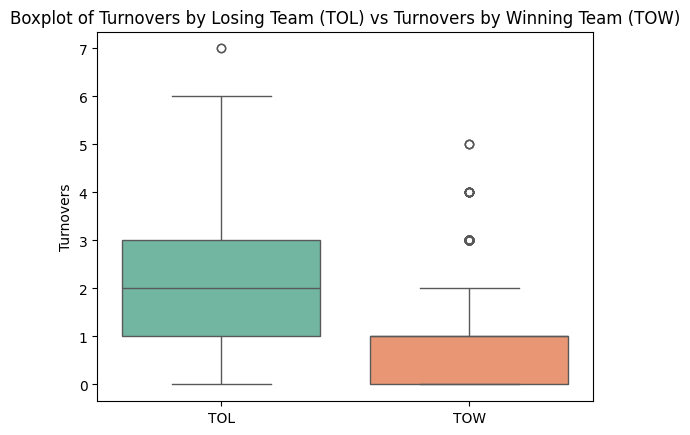

In [27]:
# TOW and TOL boxplot
sns.boxplot(data=[NFL['TOL'], NFL['TOW']], palette='Set2')

# Set the title and labels
plt.title('Boxplot of Turnovers by Losing Team (TOL) vs Turnovers by Winning Team (TOW)')
plt.xticks([0, 1], ['TOL', 'TOW'])
plt.ylabel('Turnovers')

# Show the plot
plt.show()

As expected teams with less turnovers generally win more

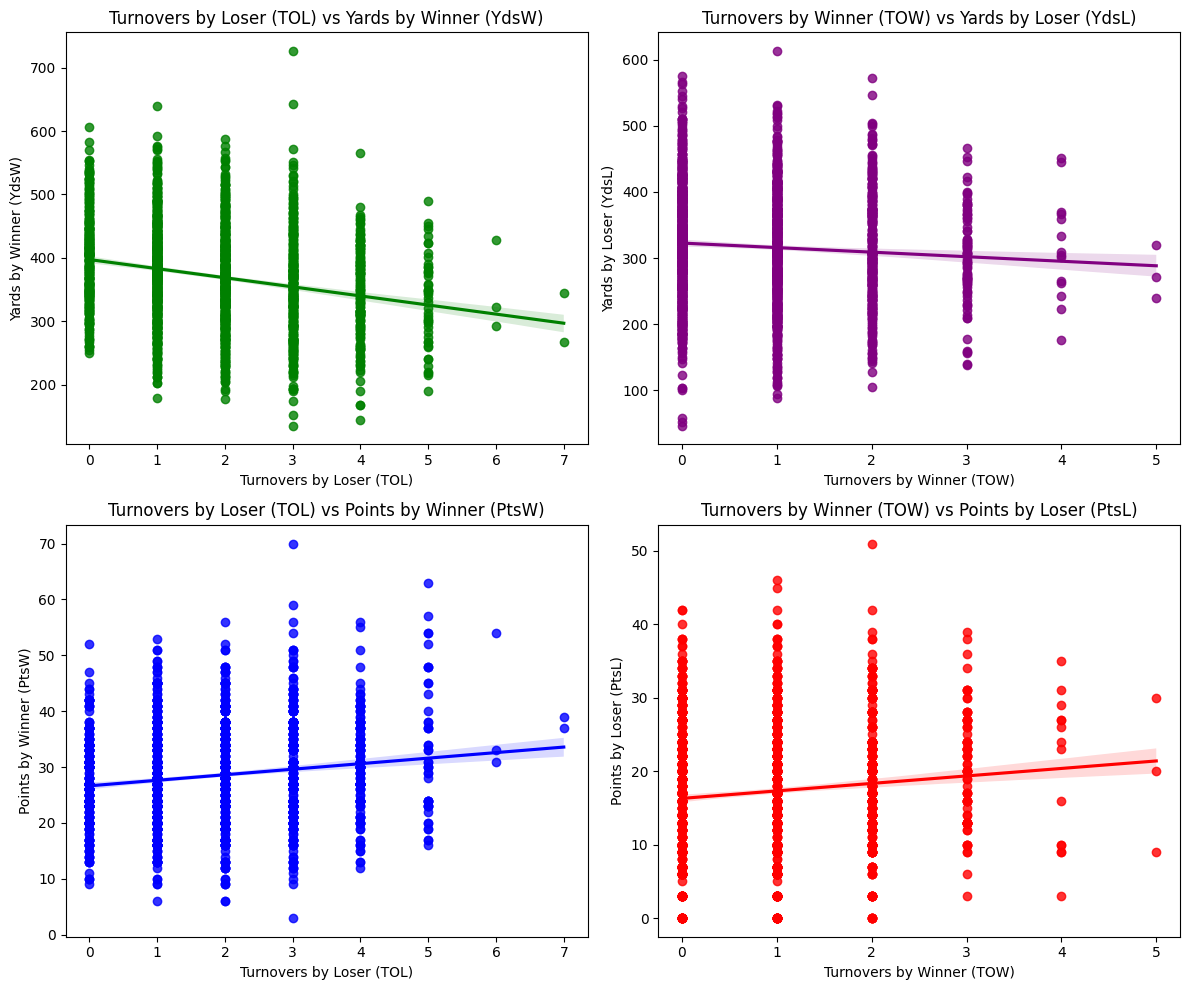

In [35]:
# Set up a 2x2 grid for subplots
plt.figure(figsize=(12, 10))

# Scatter plot 1: Turnovers by Loser vs Yards by Winner
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first subplot
sns.regplot(data=NFL, x='TOL', y='YdsW', fit_reg=True, color='green')
plt.title("Turnovers by Loser (TOL) vs Yards by Winner (YdsW)")
plt.xlabel("Turnovers by Loser (TOL)")
plt.ylabel("Yards by Winner (YdsW)")

# Scatter plot 2: Turnovers by Winner vs Yards by Loser
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second subplot
sns.regplot(data=NFL, x='TOW', y='YdsL', fit_reg=True, color='purple')
plt.title("Turnovers by Winner (TOW) vs Yards by Loser (YdsL)")
plt.xlabel("Turnovers by Winner (TOW)")
plt.ylabel("Yards by Loser (YdsL)")

# Scatter plot 3: Turnovers by Loser vs Points by Winner
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third subplot
sns.regplot(data=NFL, x='TOL', y='PtsW', fit_reg=True, color='blue')
plt.title("Turnovers by Loser (TOL) vs Points by Winner (PtsW)")
plt.xlabel("Turnovers by Loser (TOL)")
plt.ylabel("Points by Winner (PtsW)")

# Scatter plot 4: Turnovers by Winner vs Points by Loser
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth subplot
sns.regplot(data=NFL, x='TOW', y='PtsL', fit_reg=True, color='red')
plt.title("Turnovers by Winner (TOW) vs Points by Loser (PtsL)")
plt.xlabel("Turnovers by Winner (TOW)")
plt.ylabel("Points by Loser (PtsL)")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


These trends generally make sense, more turnovers by a team would mean the opposing teams offense needs less yards to score.

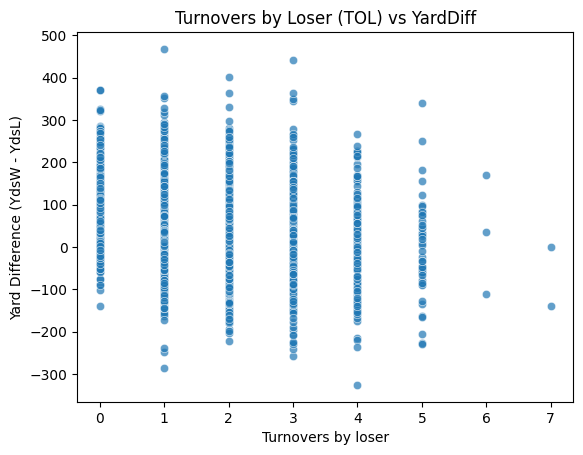

In [29]:
# TOL vs Yard diff
sns.scatterplot(data=NFL, x='TOL', y='YardDiff', alpha=0.7)
plt.xlabel('Turnovers by loser')
plt.ylabel('Yard Difference (YdsW - YdsL)')
plt.title('Turnovers by Loser (TOL) vs YardDiff')
plt.show()

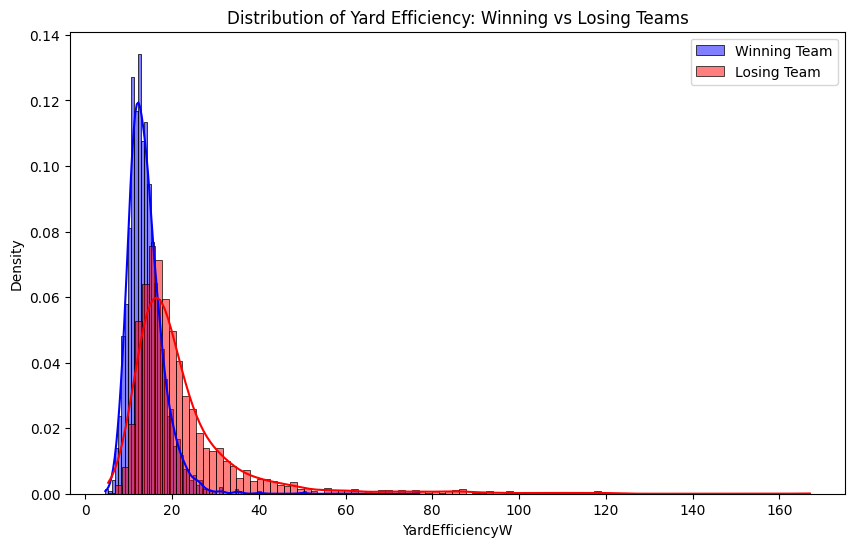

In [36]:
# Distribution of Yard Efficiency for Winning and Losing Teams
plt.figure(figsize=(10, 6))
sns.histplot(NFL['YardEfficiencyW'], kde=True, color='blue', label='Winning Team', stat='density')
sns.histplot(NFL['YardEfficiencyL'], kde=True, color='red', label='Losing Team', stat='density')
plt.title('Distribution of Yard Efficiency: Winning vs Losing Teams')
plt.legend()
plt.show()

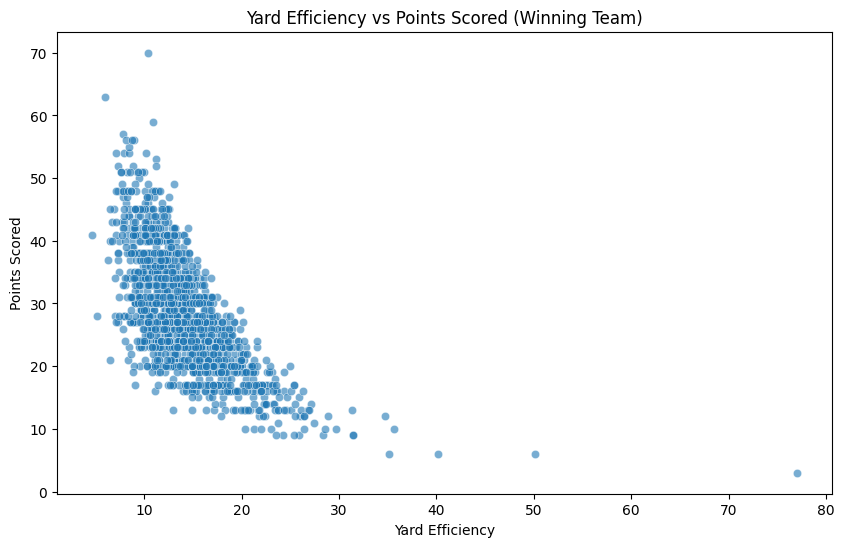

In [45]:
# Scatter plot for Yard Efficiency vs Points Scored
plt.figure(figsize=(10, 6))
sns.scatterplot(x=NFL['YardEfficiencyW'], y=NFL['PtsW'], alpha=0.6)
plt.title('Yard Efficiency vs Points Scored (Winning Team)')
plt.xlabel('Yard Efficiency')
plt.ylabel('Points Scored')
plt.show()

/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_85810/1529402298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Winner', y='YardEfficiencyW', data=NFL, palette='Set2')


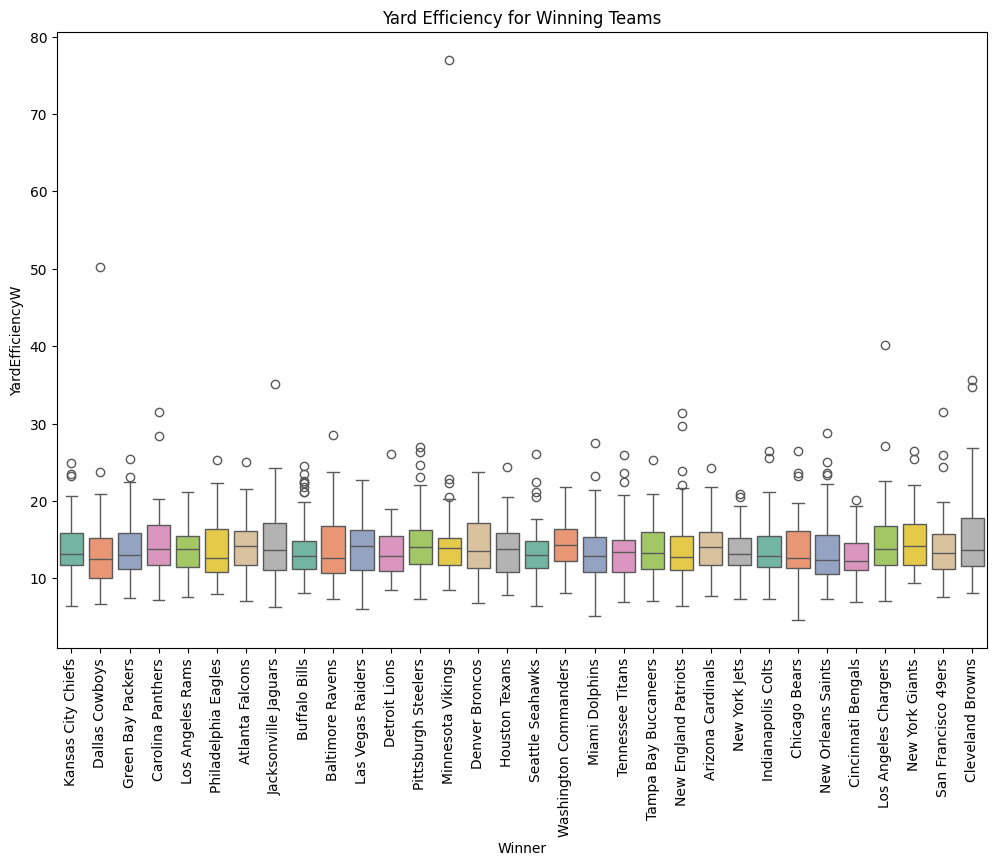

In [41]:
# Boxplot of Yard Efficiency for Winning and Losing Teams
plt.figure(figsize=(12, 8))
sns.boxplot(x='Winner', y='YardEfficiencyW', data=NFL, palette='Set2')
plt.title('Yard Efficiency for Winning Teams')
plt.xticks(rotation=90)
plt.show()

In [44]:
# Filter the data for games involving the Steelers
vikings_games = NFL[(NFL['Winner'] == 'Minnesota Vikings') | (NFL['Loser'] == 'Minnesota Vikings')]
vikings_games[['Date', 'Winner', 'Loser', 'YardEfficiencyW', 'YardEfficiencyL', 'PtsW', 'PtsL']]

# Find extreme outlier games
vikings_outlier=vikings_games[vikings_games['YardEfficiencyW'] > vikings_games['YardEfficiencyW'].quantile(0.95)]
print(vikings_outlier[['Date', 'Winner', 'Loser', 'YardEfficiencyW', 'PtsW', 'YdsW', 'YdsL']])

           Date             Winner                  Loser  YardEfficiencyW  \
189  2017-12-03  Minnesota Vikings        Atlanta Falcons            22.29   
640  2019-10-24  Minnesota Vikings  Washington Commanders            22.84   
1123 2021-10-03   Cleveland Browns      Minnesota Vikings            23.36   
1189 2021-10-31     Dallas Cowboys      Minnesota Vikings            20.95   
1818 2023-11-27      Chicago Bears      Minnesota Vikings            26.42   
1833 2023-12-10  Minnesota Vikings      Las Vegas Raiders            77.00   

      PtsW  YdsW  YdsL  
189     14   312   275  
640     19   434   216  
1123    14   327   255  
1189    20   419   278  
1818    12   317   242  
1833     3   231   202  


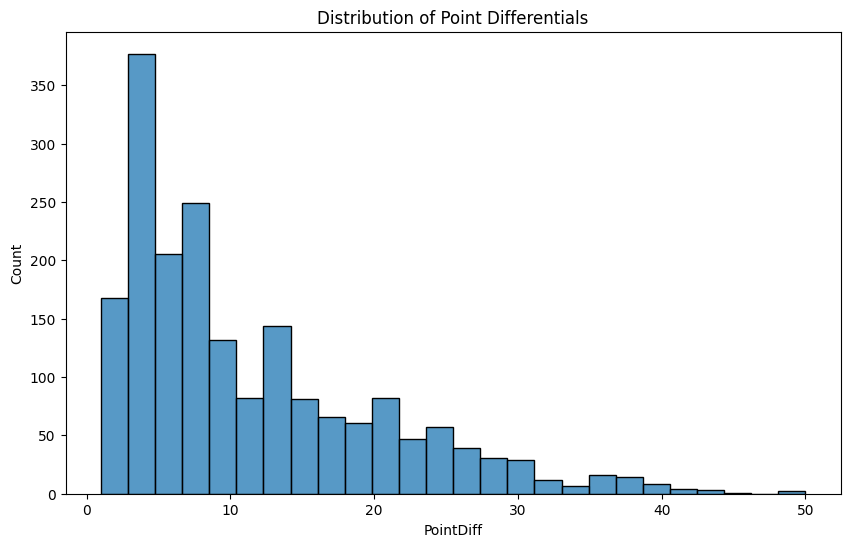

In [47]:
# Plotting PointDiff to check how convincing the victories are
plt.figure(figsize=(10,6))
sns.histplot(NFL['PointDiff'])
plt.title('Distribution of Point Differentials')
plt.show()